In [3]:
#country_region_code,country_region,sub_region_1
#gl=pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/Global_Mobility_Report (1).csv',low_memory=False)
#print(gl)
#ca=gl[gl['country_region_code']=='US']
#print(ca)
#ca= ca[ca['sub_region_1']=='California']
#print(ca)
#ca.to_csv('onlyca.csv')

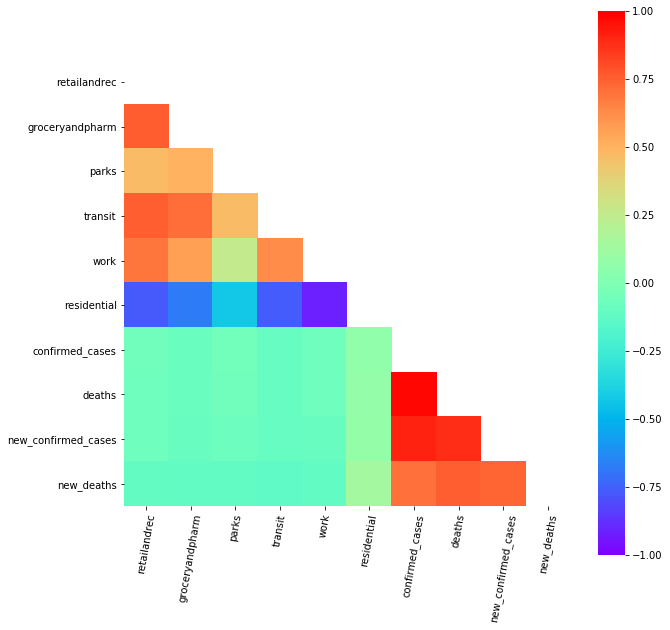

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import sys
import datetime
#movement data starts feb 15
camove = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/onlyca 7dash13.csv')
cadata = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/cadata.csv')
camove=camove.rename(columns={"sub_region_2":"county","retail_and_recreation_percent_change_from_baseline": "retailandrec","grocery_and_pharmacy_percent_change_from_baseline": "groceryandpharm","parks_percent_change_from_baseline":"parks","transit_stations_percent_change_from_baseline":"transit","workplaces_percent_change_from_baseline":"work","residential_percent_change_from_baseline":"residential"})
camove=camove.drop(columns=['Unnamed: 0','country_region_code','country_region','sub_region_1','iso_3166_2_code','census_fips_code'])
cadata=cadata.drop(columns=['fips'])
#print(camove)

camove=camove.set_index(['county','date'])
cadata=cadata.set_index(['county','date'])

new_df = camove.merge(cadata,how='inner', left_index=True, right_index=True)



new_df.to_csv("completedataset.csv")


